In [67]:
#Startup Funding Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('C:/Users/Suman Shekhar/Desktop/Data Science and ML/Project  Case Study (Part - I)/Dataset/startup_funding.csv')
df


,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN
...,...,...,...,...,...,...,...,...,...,...
2367,2367,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"4,500,000",NaN
2368,2368,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"825,000",Govt backed VC Fund
2369,2369,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000",NaN
2370,2370,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


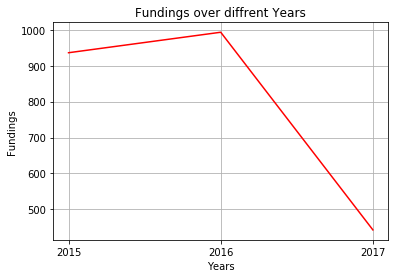

2015 936
2016 993
2017 443


In [2]:
#Number of Fundings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('C:/Users/panka/Documents/CodingNinjaDS/Project  Case Study (Part - I)/Dataset/startup_funding.csv')
 
date=df['Date']
date=date.str[-4::]
date.dropna(inplace=True)
date=date.value_counts()
date=date.sort_index()
years=date.index
fundings=date.values
plt.plot(years, fundings, color='red')
plt.xlabel('Years')
plt.ylabel('Fundings')
plt.title('Fundings over diffrent Years')
plt.grid()
plt.show()
for i in range(years.shape[0]):
    print(years[i],fundings[i])

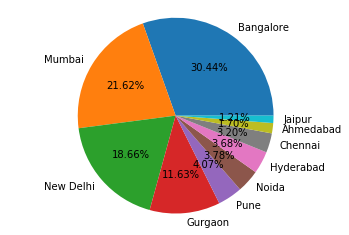

Bangalore 628
Mumbai 446
New Delhi 385
Gurgaon 240
Pune 84
Noida 78
Hyderabad 76
Chennai 66
Ahmedabad 35
Jaipur 25


In [66]:
#Top Indian Cities
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('C:/Users/Suman Shekhar/Desktop/Data Science and ML/Project  Case Study (Part - I)/Dataset/startup_funding.csv')

df.dropna(subset=['CityLocation'], inplace=True)
df['CityLocation']=df['CityLocation'].str.title()
df['CityLocation'].replace('Delhi','New Delhi',inplace=True)
city=df['CityLocation']
city=city.value_counts()
city=city.iloc[:10]
cities=city.index
startups=city.values
#print(startups)
plt.pie(startups, labels=cities, autopct='%.2f%%')
plt.axis("equal")
plt.show()
for i in range(cities.shape[0]):
    print(cities[i],startups[i])

In [65]:
#Funding amount unorganised
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('C:/Users/Suman Shekhar/Desktop/Data Science and ML/Project  Case Study (Part - I)/Dataset/startup_funding.csv', skipinitialspace=True)

df.dropna(subset=['AmountInUSD', 'CityLocation'], inplace=True)
df['CityLocation'].replace('Delhi','New Delhi',inplace=True)
df['CityLocation'].replace('bangalore','Bangalore',inplace=True)

def fun(s):
    return s.split('/')[0].strip()


df['CityLocation']=df['CityLocation'].apply(fun)
df['AmountInUSD']=df['AmountInUSD'].str.replace(',','')
df['AmountInUSD']=df['AmountInUSD'].astype(float)
city=df['CityLocation']
city=city.value_counts()
city=city[:10]
city=city.index
fundings=[]
for i in city:
    indexes=df['CityLocation']==i
    s=df['AmountInUSD'][indexes].sum()
    fundings.append(s)
fundings=np.array(fundings)
index=np.argsort(fundings)
fundings=fundings[index[::-1]]
city=city[index[::-1]]
total_funding=fundings.sum()
percent=fundings/total_funding*100
#print(city)
#print(percent)
for i in range(city.shape[0]):
    print(city[i], format(percent[i], '.2f'))

Bangalore 49.71
New Delhi 16.63
Mumbai 13.90
Gurgaon 12.21
Chennai 2.43
Pune 2.16
Hyderabad 1.15
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21


In [64]:
#Funding amount organised
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('C:/Users/Suman Shekhar/Desktop/Data Science and ML/Project  Case Study (Part - I)/Dataset/startup_funding.csv', skipinitialspace=True)

df.dropna(subset=['AmountInUSD', 'CityLocation'], inplace=True)
df['CityLocation'].replace(['Delhi','bangalore'],['New Delhi','Bangalore'],inplace=True)
df['CityLocation']=df['CityLocation'].str.split('/', expand=True)[0].str.strip()
df['AmountInUSD']=df['AmountInUSD'].apply(lambda s: float(s.replace(',','')))
fundings=df.groupby('CityLocation')['AmountInUSD'].sum().sort_values(ascending=False)[0:10]
city=fundings.index
s=sum(fundings.values)
percent=fundings.values/s*100
for i in range(city.shape[0]):
    print(city[i], format(percent[i], '.2f'))

Bangalore 49.71
New Delhi 16.63
Mumbai 13.90
Gurgaon 12.21
Chennai 2.43
Pune 2.16
Hyderabad 1.15
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21


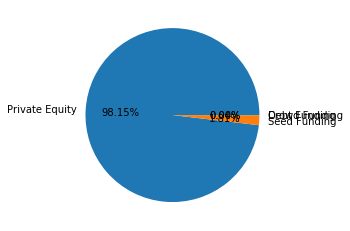

Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.00


In [63]:
#Investment Type
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('C:/Users/Suman Shekhar/Desktop/Data Science and ML/Project  Case Study (Part - I)/Dataset/startup_funding.csv', skipinitialspace=True)

df.dropna(subset=['InvestmentType','AmountInUSD'], inplace=True)
#df['InvestmentType'].unique()
df['InvestmentType'].replace(['PrivateEquity','Crowd funding', 'SeedFunding'],['Private Equity','Crowd Funding','Seed Funding'], inplace=True)
#df['InvestmentType'].unique()
df['AmountInUSD']=df['AmountInUSD'].apply(lambda s: float(s.replace(',','')))
#df['AmountInUSD']
investment=df.groupby('InvestmentType')['AmountInUSD'].sum().sort_values(ascending=False)
investmentType=investment.index
fundings=investment.values
s=sum(fundings)
percent=fundings/s*100
plt.pie(fundings, labels=investmentType,autopct="%.2f%%")
plt.show()
for i in range(fundings.shape[0]):
    print(investmentType[i], format(percent[i], '.2f'))

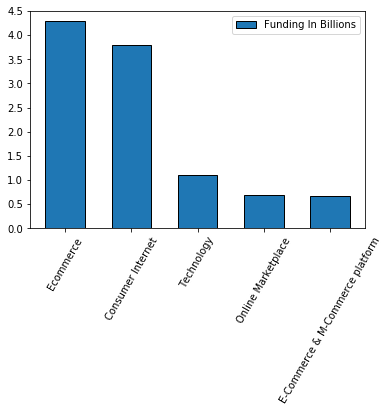

Ecommerce 40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


In [62]:
#Top Industries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('C:/Users/Suman Shekhar/Desktop/Data Science and ML/Project  Case Study (Part - I)/Dataset/startup_funding.csv', skipinitialspace=True)

df.dropna(subset=['IndustryVertical', 'AmountInUSD'], inplace=True)
#df['IndustryVertical'].unique()
df['IndustryVertical'].replace(['eCommerce','ECommerce','ecommerce'],'Ecommerce', inplace=True)
#df['IndustryVertical'].unique()
df['AmountInUSD']=df['AmountInUSD'].apply(lambda s: float(s.replace(',','')))
industry=df.groupby('IndustryVertical')['AmountInUSD'].sum().sort_values(ascending=False)[0:5]
industryType=industry.index
fundings=industry.values
fundingsInBillion=fundings/1000000000
plt.bar(industryType,fundingsInBillion,edgecolor='black',width=0.6, label='Funding In Billions')
plt.xticks(rotation=60)
yticks=np.arange(0,5,0.5)
plt.yticks(yticks)
plt.legend()
plt.show()
percent=fundings/fundings.sum()*100
for i in range(fundings.shape[0]):
    print(industryType[i],format(percent[i], '.2f'))


In [61]:
#Top startups
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('C:/Users/Suman Shekhar/Desktop/Data Science and ML/Project  Case Study (Part - I)/Dataset/startup_funding.csv', skipinitialspace=True)

df.dropna(subset=['StartupName','AmountInUSD'], inplace=True)
#correcting Ola names
df['StartupName'].replace(['Ola Cabs','Olacabs'],'Ola', inplace=True)
#correcting Flipkart names
df['StartupName'].replace('Flipkart.com','Flipkart', inplace=True)
#correcting Oyo names
df['StartupName'].replace(['Oyo Rooms','OyoRooms','Oyorooms','OYO Rooms'],'Oyo', inplace=True)
#correcting Paytm names
df['StartupName'].replace('Paytm Marketplace','Paytm', inplace=True)
df['AmountInUSD']=df['AmountInUSD'].apply(lambda s: float(s.replace(',','')))
startup=df.groupby('StartupName')['AmountInUSD'].sum().sort_values(ascending=False)[0:5]
startup=startup.index
for i in startup:
    print(i)

Paytm
Flipkart
Ola
Snapdeal
Oyo


In [10]:
#Funding rounds
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('C:/Users/panka/Documents/CodingNinjaDS/Project  Case Study (Part - I)/Dataset/startup_funding.csv', skipinitialspace=True)

df.dropna(subset=['StartupName'], inplace=True)
#correcting Ola names
df['StartupName'].replace(['Ola Cabs','Olacabs'],'Ola', inplace=True)
#correcting Flipkart names
df['StartupName'].replace('Flipkart.com','Flipkart', inplace=True)
#correcting Oyo names
df['StartupName'].replace(['Oyo Rooms','OyoRooms','Oyorooms','OYO Rooms'],'Oyo', inplace=True)
#correcting Paytm names
df['StartupName'].replace('Paytm Marketplace','Paytm', inplace=True)

startups=df['StartupName'].value_counts()[0:5]
for i in range(startups.shape[0]):
    print(startups.index[i],startups.values[i])

Ola 9
Swiggy 7
UrbanClap 6
Paytm 6
Oyo 6


In [16]:
#Top Investor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('C:/Users/panka/Documents/CodingNinjaDS/Project  Case Study (Part - I)/Dataset/startup_funding.csv', skipinitialspace=True)

df.dropna(subset=['InvestorsName'],inplace=True)
df['InvestorsName']=df['InvestorsName'].str.split(',')
l=[]
for i in df['InvestorsName']:
    for j in i:
        if j!='':
            l.append(j.strip())
l=pd.Series(l)
investors=l.value_counts()
print(investors.index[0],investors.values[0])
   

Sequoia Capital 64
